# HR Analytics Project- Understanding the Attrition in HR

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/OmerFarukMerey/IBM-HR-Analytics-Employee-Attrition-Performance/main/HR-Employee-Attrition.csv')
df.shape

(1470, 35)

In [3]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
258,51,No,Travel_Rarely,833,Research & Development,1,3,Life Sciences,1,353,3,Male,96,3,1,Research Scientist,4,Married,2723,23231,1,Y,No,11,3,2,80,0,1,0,2,1,0,0,0
458,40,No,Non-Travel,1094,Sales,28,3,Other,1,615,3,Male,58,1,3,Sales Executive,1,Divorced,10932,11373,3,Y,No,15,3,3,80,1,20,2,3,1,0,0,1
1193,38,No,Travel_Frequently,148,Research & Development,2,3,Medical,1,1675,4,Female,42,2,1,Laboratory Technician,2,Single,2440,23826,1,Y,No,22,4,2,80,0,4,3,3,4,3,3,3
814,40,No,Travel_Rarely,1308,Research & Development,14,3,Medical,1,1128,3,Male,44,2,5,Research Director,3,Single,19626,17544,1,Y,No,14,3,1,80,0,21,2,4,20,7,4,9
296,18,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


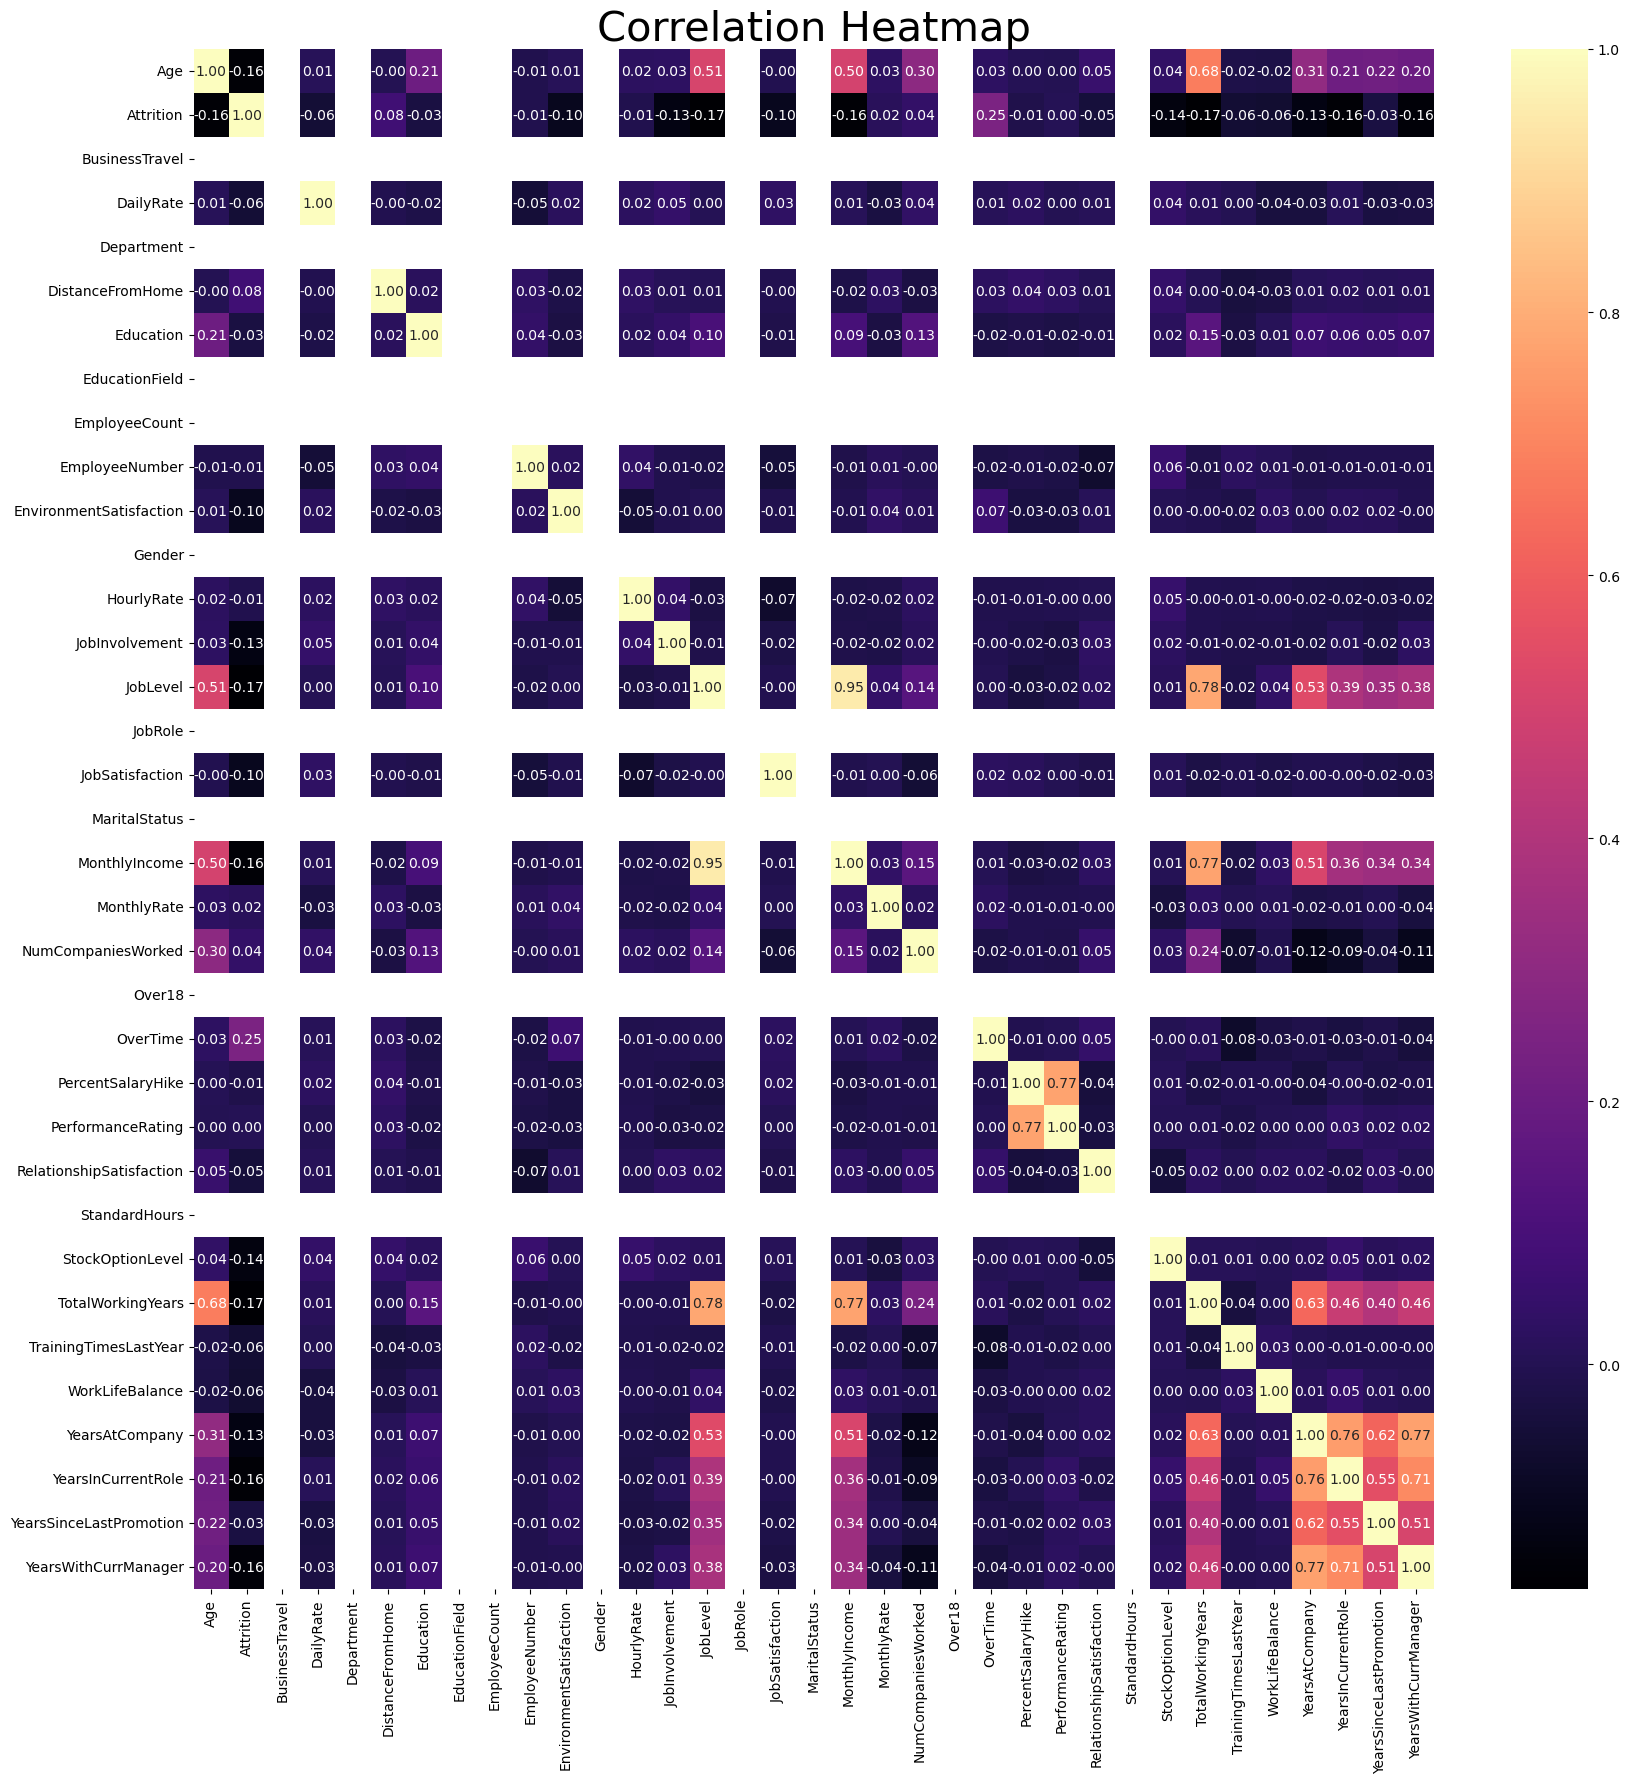

In [7]:
# 1. Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# 2. Handle non-numeric data (example: assuming 'Yes' and 'No' are binary responses)
#    Replace 'Yes' with 1 and 'No' with 0
df.replace({'Yes': 1, 'No': 0}, inplace=True)

# 3. Convert entire DataFrame to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# 4. Create the correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='magma')
plt.title('Correlation Heatmap', fontsize=30)
plt.show()


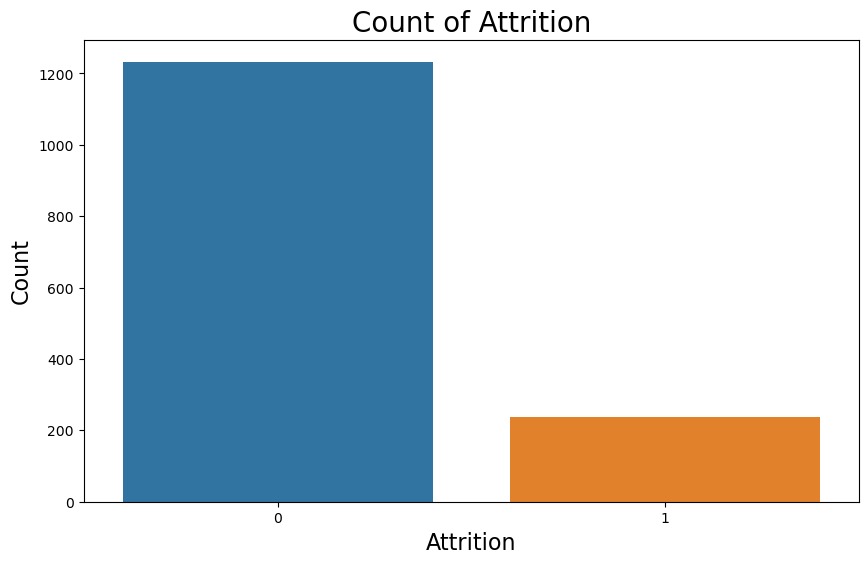

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Attrition' is a column in your DataFrame 'df'
plt.figure(figsize=(10, 6))
sns.countplot(x='Attrition', data=df)
plt.title('Count of Attrition', fontsize=20)
plt.xlabel('Attrition', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()


In [10]:
categorical_cols = [feature for feature in df.columns if df[feature].dtypes=='object']
df[categorical_cols].sample(5)

""
1296
1398
384
997
1450


In [11]:
numerical_cols = [feature for feature in df.columns if df[feature].dtypes!='object']
df[numerical_cols].sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1056,28,1,NaN,1496,NaN,1,3,NaN,1,1486,1,NaN,92,3,1,NaN,3,NaN,2909,15747,3,NaN,0,15,3,4,80,1,5,3,4,3,2,1,2
215,41,0,NaN,896,NaN,6,3,NaN,1,298,4,NaN,75,3,3,NaN,4,NaN,13591,14674,3,NaN,1,18,3,3,80,0,16,3,3,1,0,0,0
1310,58,0,NaN,1216,NaN,15,4,NaN,1,1837,1,NaN,87,3,4,NaN,3,NaN,15787,21624,2,NaN,1,14,3,2,80,0,23,3,3,2,2,2,2
401,56,0,NaN,906,NaN,6,3,NaN,1,532,3,NaN,86,4,4,NaN,1,NaN,13212,18256,9,NaN,0,11,3,4,80,3,36,0,2,7,7,7,7
360,57,0,NaN,593,NaN,1,4,NaN,1,482,4,NaN,88,3,2,NaN,3,NaN,6755,2967,2,NaN,0,11,3,3,80,0,15,2,3,3,2,1,2


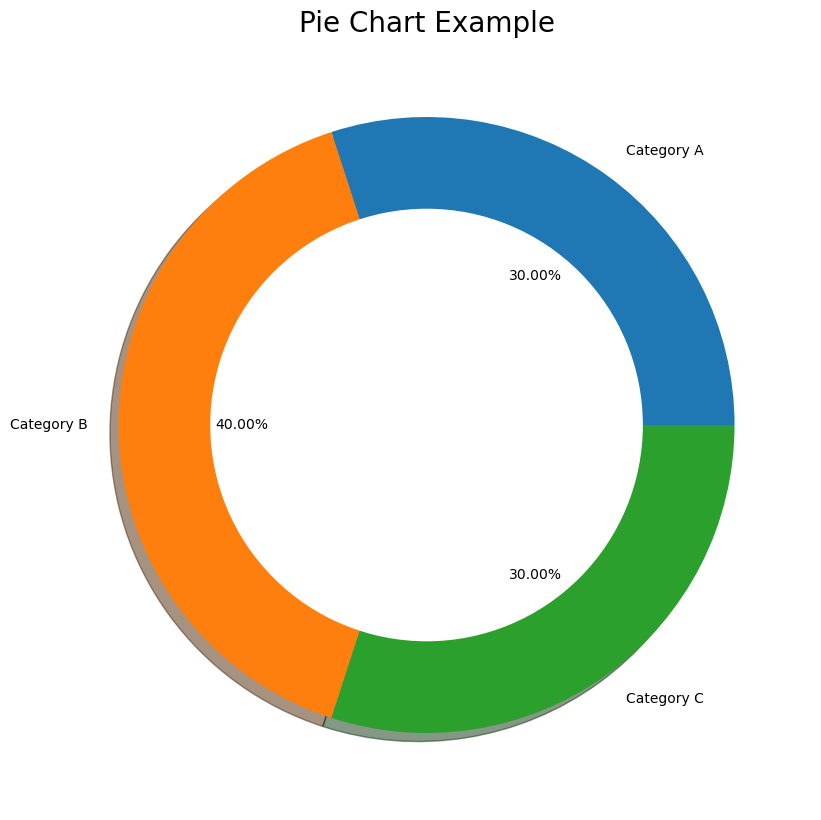

In [13]:
import matplotlib.pyplot as plt

# Example data
labels = ['Category A', 'Category B', 'Category C']
sizes = [30, 40, 30]  # Sum of sizes should be 100% for a full pie chart

# Plotting
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%.2f%%', shadow=True)
plt.title('Pie Chart Example', fontsize=20)

# Adding a white circle to create a donut chart effect
circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)

plt.show()


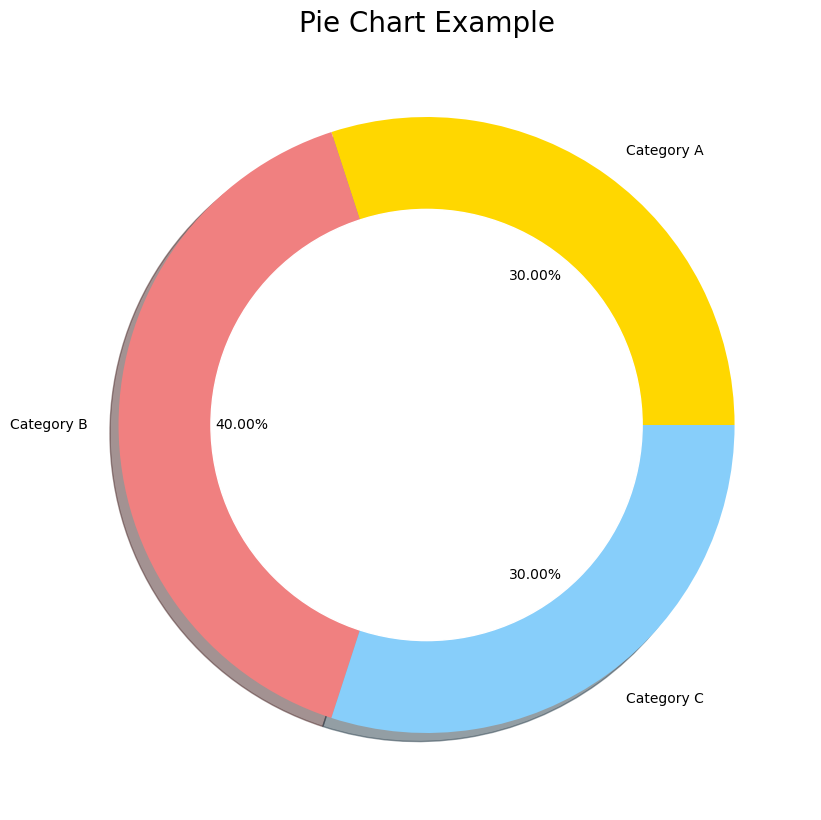

In [15]:
import matplotlib.pyplot as plt

# Example data
labels = ['Category A', 'Category B', 'Category C']
sizes = [30, 40, 30]  # Sum of sizes should be 100% for a full pie chart
colors = ['gold', 'lightcoral', 'lightskyblue']

# Plotting
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, colors=colors, autopct='%.2f%%', shadow=True)
plt.title('Pie Chart Example', fontsize=20)

# Adding a white circle to create a donut chart effect
circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)

plt.show()


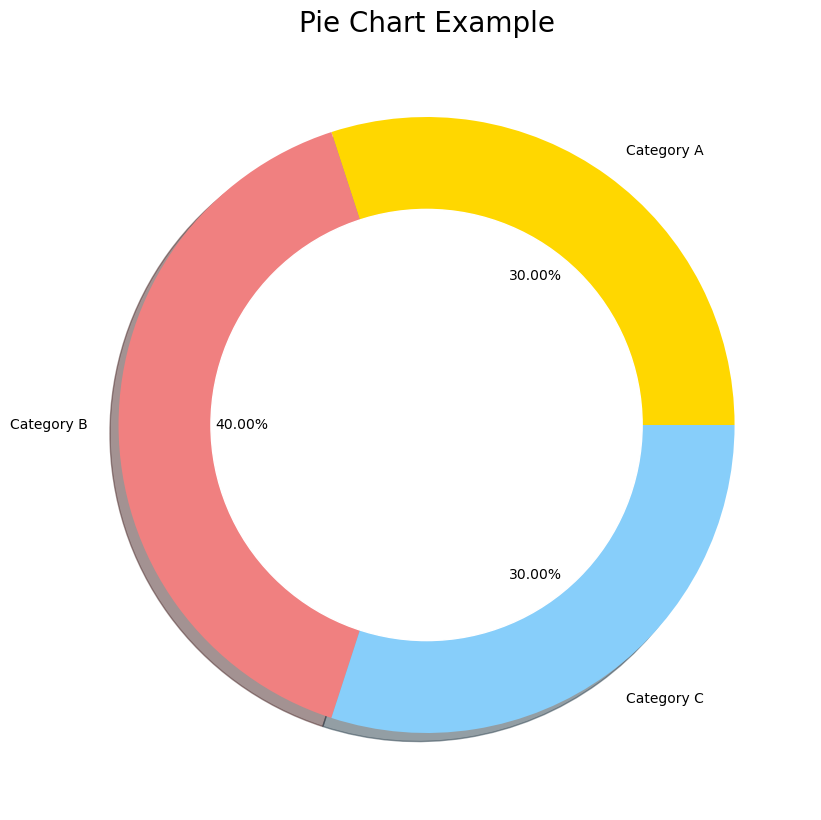

In [17]:
import matplotlib.pyplot as plt

# Example data
labels = ['Category A', 'Category B', 'Category C']
sizes = [30, 40, 30]  # Sum of sizes should be 100% for a full pie chart
colors = ['gold', 'lightcoral', 'lightskyblue']

# Plotting
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, colors=colors, autopct='%.2f%%', shadow=True)
plt.title('Pie Chart Example', fontsize=20)

# Adding a white circle to create a donut chart effect
circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)

plt.show()


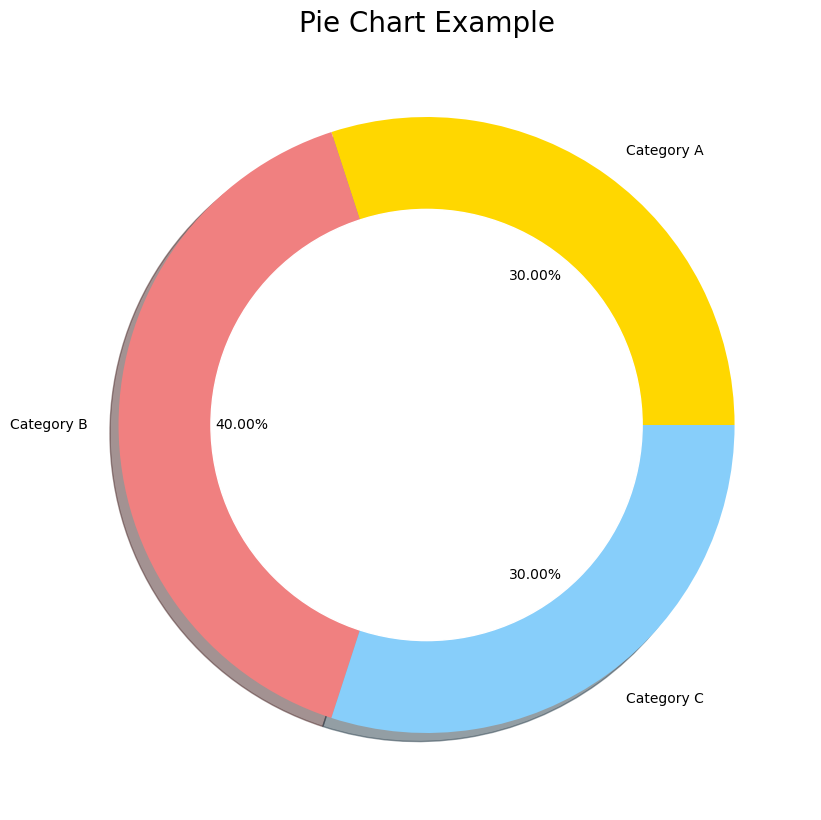

In [19]:
import matplotlib.pyplot as plt

# Example data
labels = ['Category A', 'Category B', 'Category C']
sizes = [30, 40, 30]  # Sum of sizes should be 100% for a full pie chart
colors = ['gold', 'lightcoral', 'lightskyblue']

# Plotting
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, colors=colors, autopct='%.2f%%', shadow=True)
plt.title('Pie Chart Example', fontsize=20)

# Adding a white circle to create a donut chart effect
circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)

plt.show()


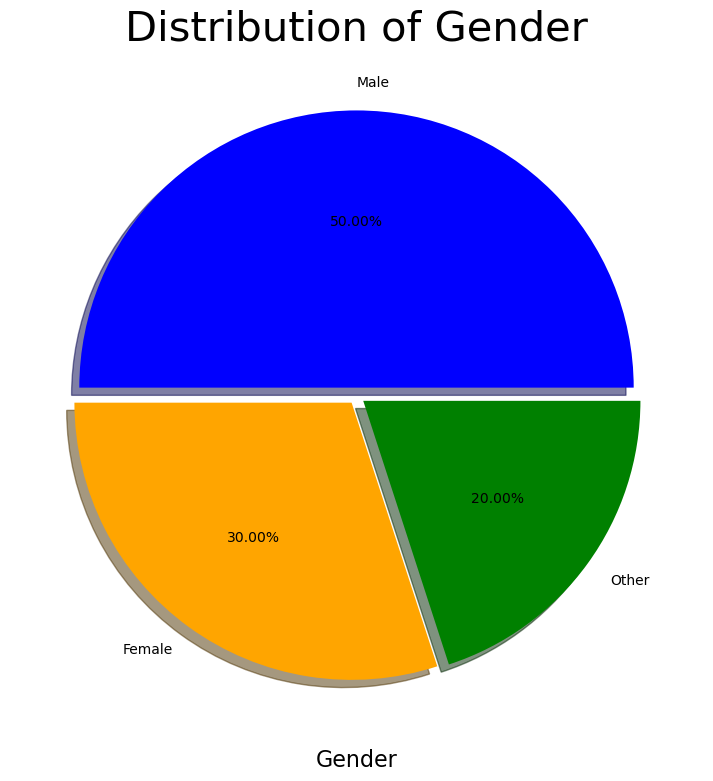

In [25]:
import matplotlib.pyplot as plt

# Example corrected usage with explicit labels assuming 'size' and 'labels' are defined correctly
size = [50, 30, 20]  # Example data sizes for each category
labels = ['Male', 'Female', 'Other']  # Labels corresponding to each category
colors = ['blue', 'orange', 'green']  # Optional: Custom colors for each category
explode = [0.03, 0.03, 0.03]  # Optional: Explode values for each category

plt.figure(figsize=(9, 9))
plt.pie(size, colors=colors, labels=labels, explode=explode, autopct='%.2f%%', shadow=True)
plt.title('Distribution of Gender', fontsize=30)
plt.xlabel('Gender', fontsize=16)
plt.show()


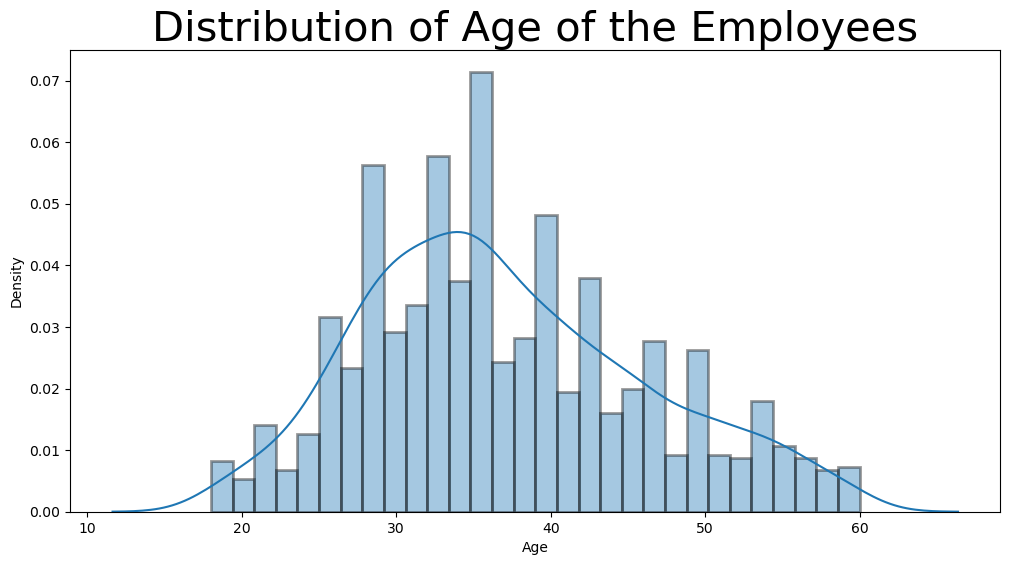

In [26]:
plt.figure(figsize=(12,6))
sns.distplot(df['Age'], bins=30, hist_kws=dict(edgecolor='black', linewidth=2))
plt.title('Distribution of Age of the Employees', fontsize=30)
plt.xlabel('Age')
plt.show()

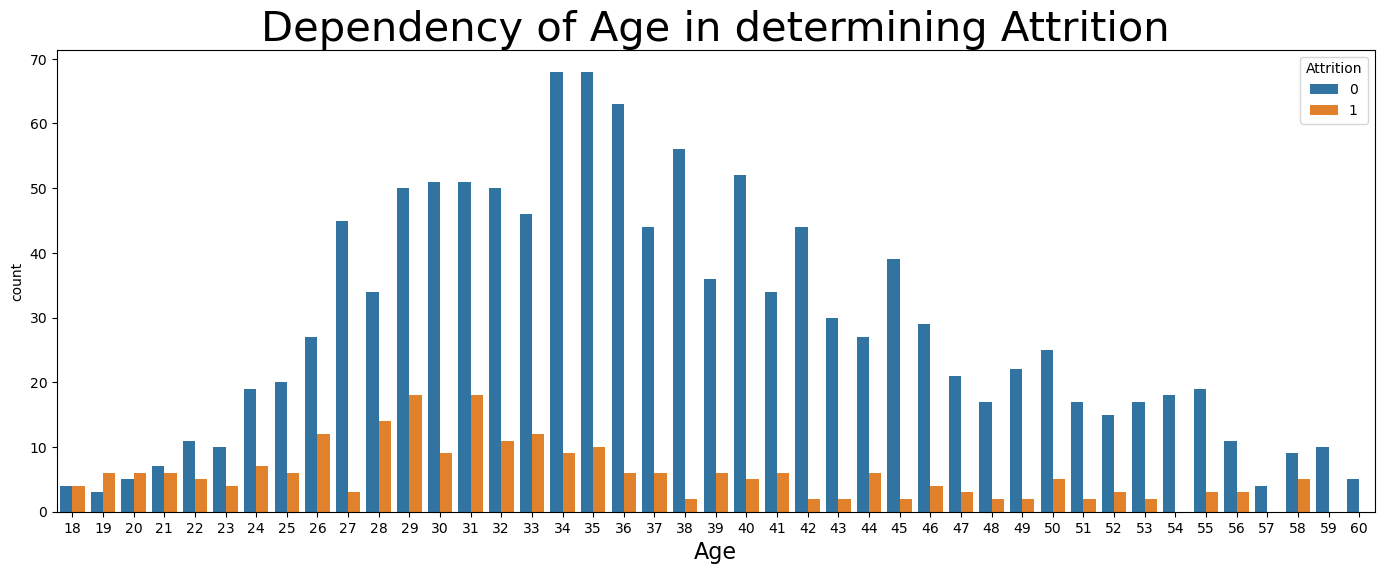

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17, 6))
sns.countplot(x='Age', hue='Attrition', data=df)
plt.title('Dependency of Age in determining Attrition', fontsize=30)
plt.xlabel('Age', fontsize=16)
plt.show()


<Figure size 1900x600 with 0 Axes>

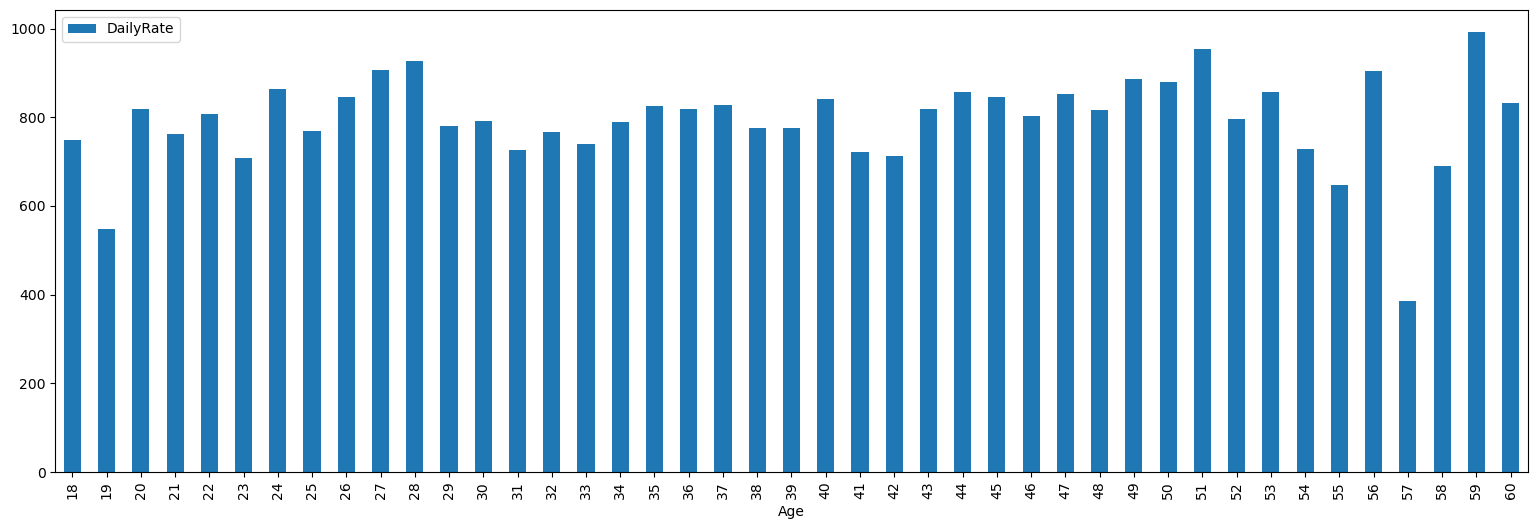

In [32]:
plt.figure(figsize=(19,6))
x = df[['Age', 'DailyRate']].groupby('Age').mean()
x = pd.DataFrame(x)
x.sort_values(by = 'Age').plot(kind='bar', figsize=(19,6));

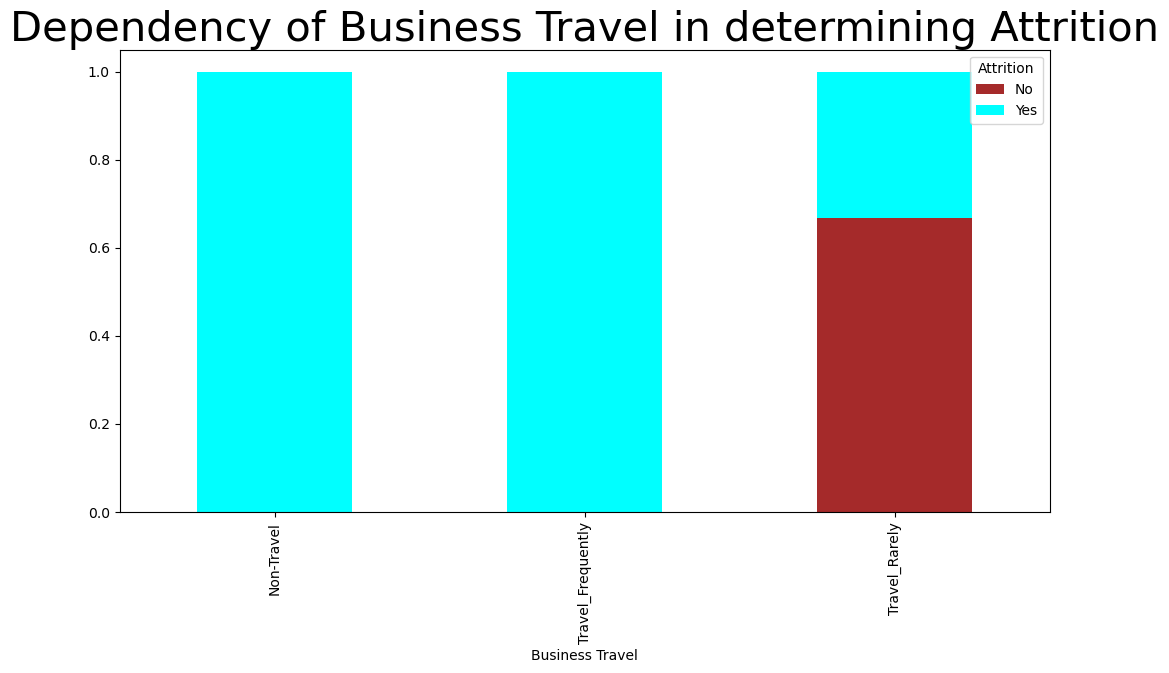

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data setup
df = pd.DataFrame({
    'BusinessTravel': ['Travel_Rarely', 'Travel_Rarely', 'Travel_Frequently', 'Travel_Rarely', 'Non-Travel'],
    'Attrition': ['Yes', 'No', 'Yes', 'No', 'Yes']
})

# Crosstabulation to count occurrences
data = pd.crosstab(df['BusinessTravel'], df['Attrition'])

# Ensure data contains numeric values
if not data.empty and data.dtypes.apply(pd.api.types.is_numeric_dtype).all():
    # Normalize and plot
    data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'cyan'], figsize=(12,6))
    plt.title('Dependency of Business Travel in determining Attrition', fontsize=30)
    plt.xlabel('Business Travel')
    plt.show()
else:
    print("Data does not contain numeric values suitable for plotting.")


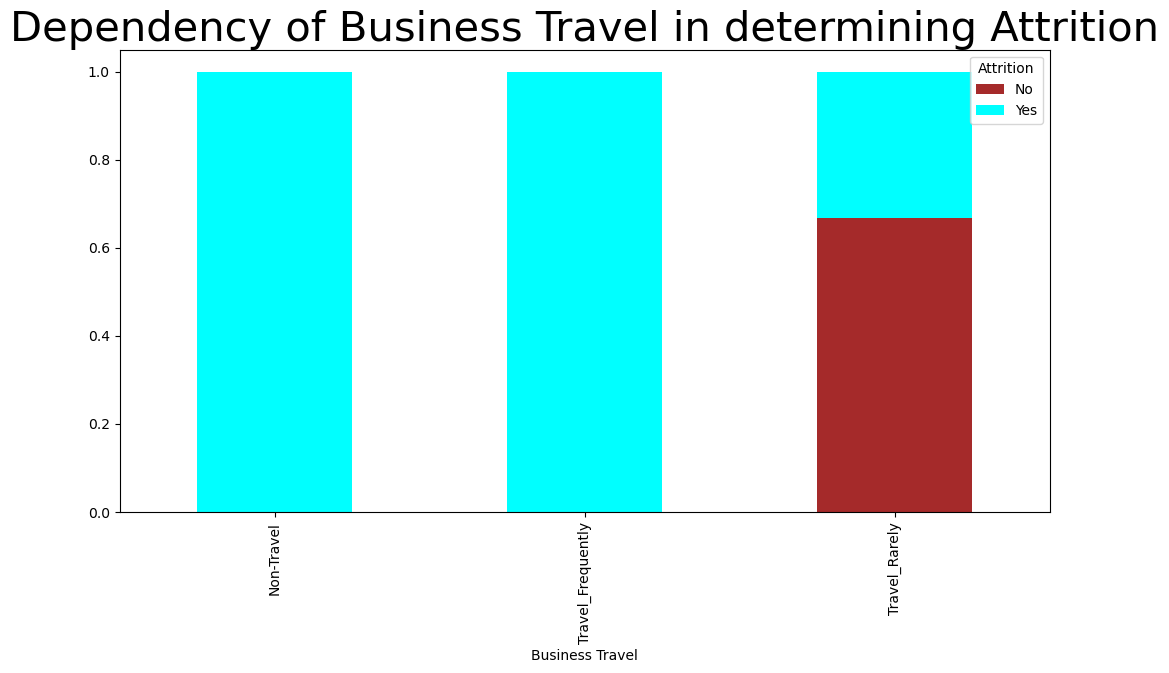

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data setup (replace with your actual data loading step)
df = pd.DataFrame({
    'BusinessTravel': ['Travel_Rarely', 'Travel_Rarely', 'Travel_Frequently', 'Travel_Rarely', 'Non-Travel'],
    'Attrition': ['Yes', 'No', 'Yes', 'No', 'Yes']
})

# Assuming 'Department' column was supposed to be used
# Let's create a crosstab between 'BusinessTravel' and 'Attrition' instead

# Crosstabulation to count occurrences
data = pd.crosstab(df['BusinessTravel'], df['Attrition'])

# Ensure data contains numeric values
if not data.empty and data.dtypes.apply(pd.api.types.is_numeric_dtype).all():
    # Normalize and plot
    data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'cyan'], figsize=(12,6))
    plt.title('Dependency of Business Travel in determining Attrition', fontsize=30)
    plt.xlabel('Business Travel')
    plt.show()
else:
    print("Data does not contain numeric values suitable for plotting.")


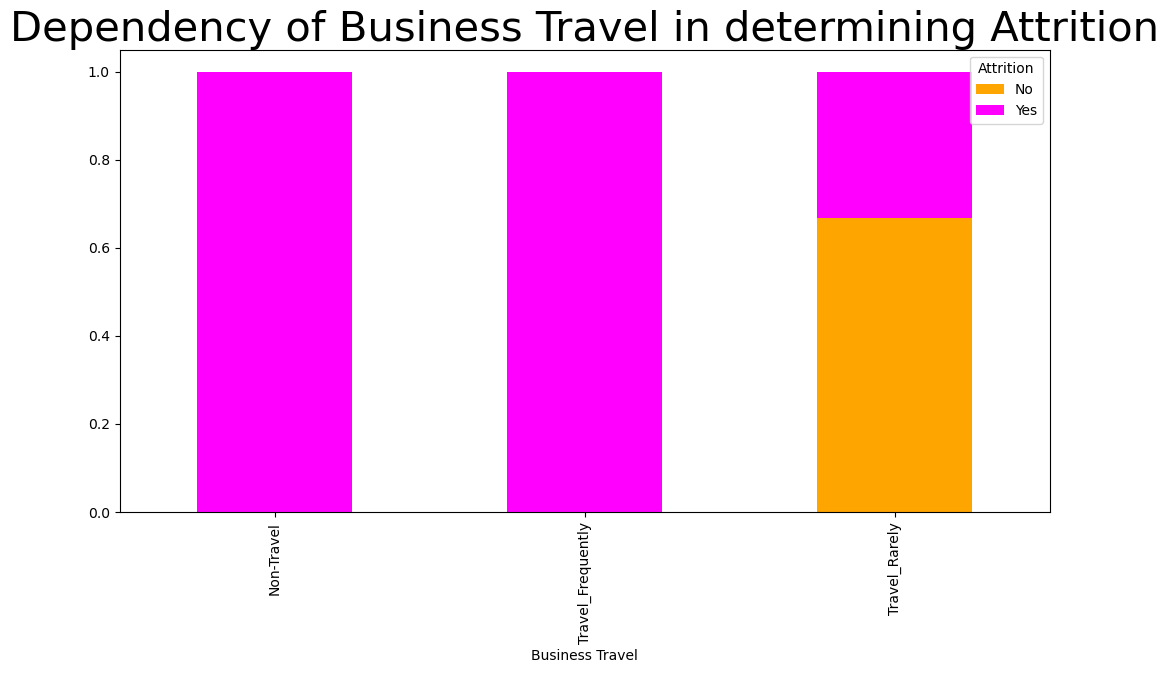

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data setup (replace with your actual data loading step)
df = pd.DataFrame({
    'BusinessTravel': ['Travel_Rarely', 'Travel_Rarely', 'Travel_Frequently', 'Travel_Rarely', 'Non-Travel'],
    'Attrition': ['Yes', 'No', 'Yes', 'No', 'Yes']
})

# Assuming 'JobRole' column was supposed to be used
# Let's create a crosstab between 'BusinessTravel' and 'Attrition' instead

# Crosstabulation to count occurrences
data = pd.crosstab(df['BusinessTravel'], df['Attrition'])

# Ensure data contains numeric values
if not data.empty and data.dtypes.apply(pd.api.types.is_numeric_dtype).all():
    # Normalize and plot
    data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'magenta'], figsize=(12,6))
    plt.title('Dependency of Business Travel in determining Attrition', fontsize=30)
    plt.xlabel('Business Travel')
    plt.show()
else:
    print("Data does not contain numeric values suitable for plotting.")


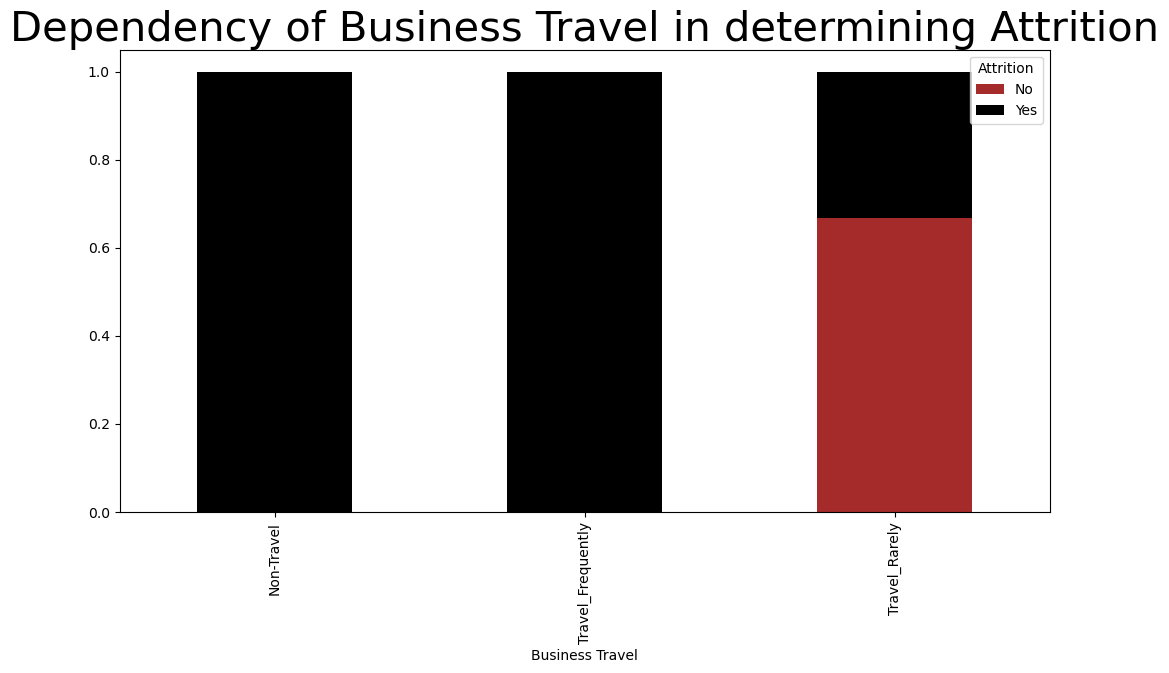

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data setup (replace with your actual data loading step)
df = pd.DataFrame({
    'BusinessTravel': ['Travel_Rarely', 'Travel_Rarely', 'Travel_Frequently', 'Travel_Rarely', 'Non-Travel'],
    'Attrition': ['Yes', 'No', 'Yes', 'No', 'Yes']
})

# Assuming 'OverTime' column was supposed to be used
# Let's create a crosstab between 'BusinessTravel' and 'Attrition' instead

# Crosstabulation to count occurrences
data = pd.crosstab(df['BusinessTravel'], df['Attrition'])

# Ensure data contains numeric values
if not data.empty and data.dtypes.apply(pd.api.types.is_numeric_dtype).all():
    # Normalize and plot
    data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'black'], figsize=(12,6))
    plt.title('Dependency of Business Travel in determining Attrition', fontsize=30)
    plt.xlabel('Business Travel')
    plt.show()
else:
    print("Data does not contain numeric values suitable for plotting.")


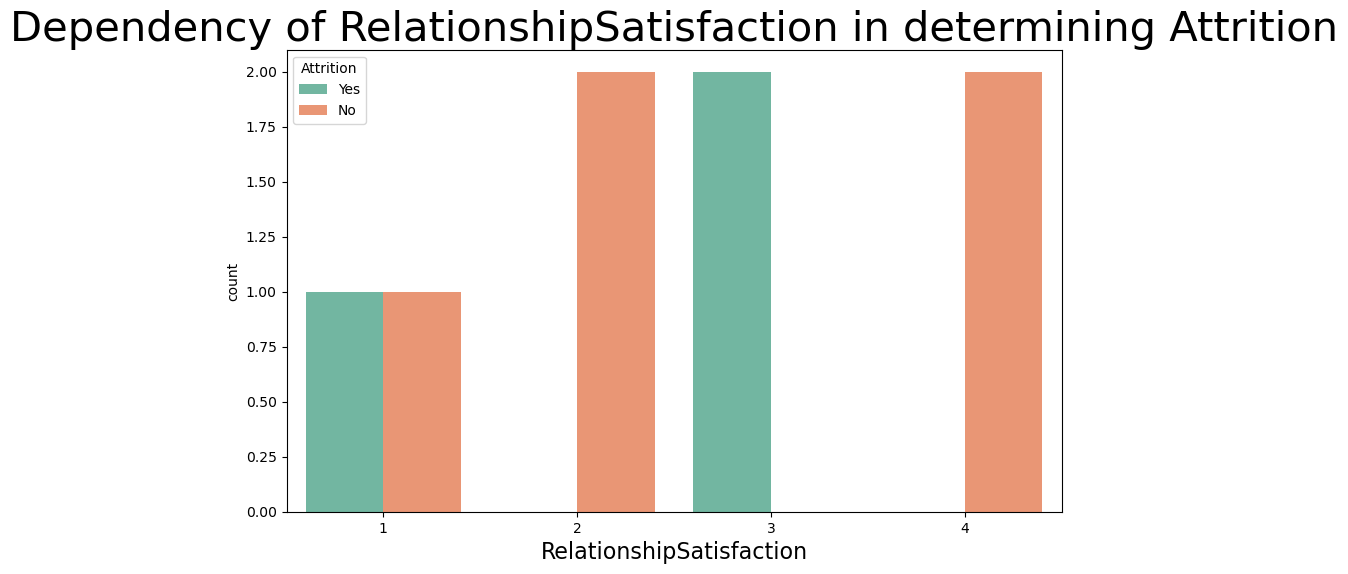

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data setup (replace with your actual data loading step)
df = pd.DataFrame({
    'RelationshipSatisfaction': [3, 1, 4, 2, 3, 4, 1, 2],
    'Attrition': ['Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No']
})

plt.figure(figsize=(10, 6))
sns.countplot(x='RelationshipSatisfaction', hue='Attrition', data=df, palette='Set2')
plt.title('Dependency of RelationshipSatisfaction in determining Attrition', fontsize=30)
plt.xlabel('RelationshipSatisfaction', fontsize=16)
plt.show()


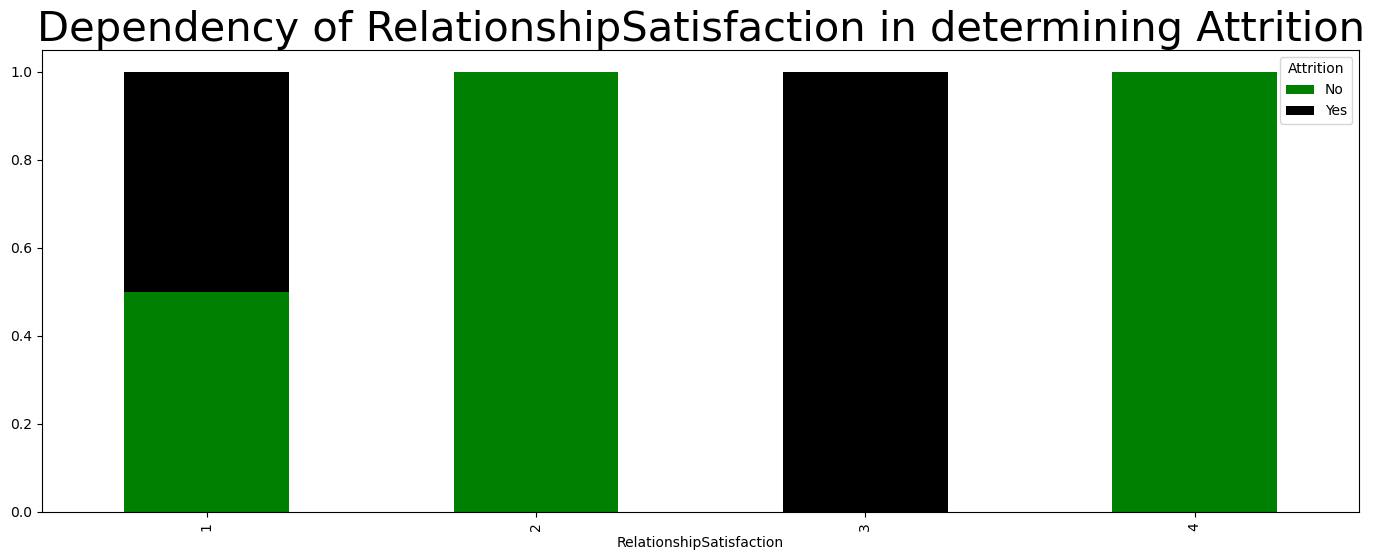

In [43]:
data=pd.crosstab(df['RelationshipSatisfaction'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['green', 'black'], 
                                                figsize=(17,6))
plt.title('Dependency of RelationshipSatisfaction in determining Attrition', fontsize=30)
plt.xlabel('RelationshipSatisfaction')
plt.show()

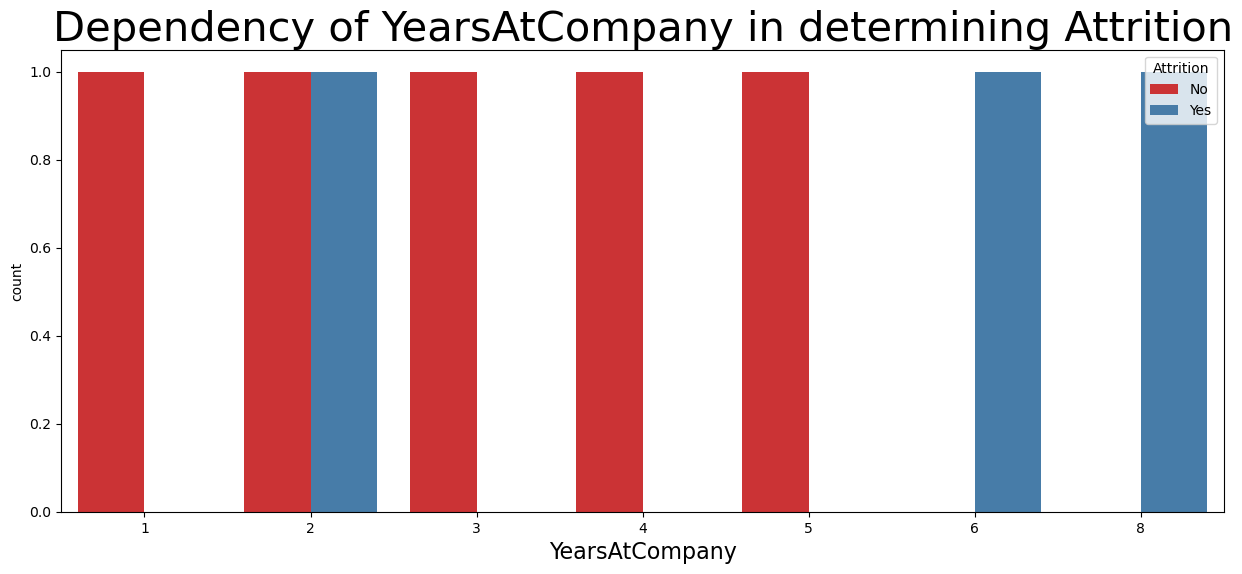

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data setup (replace with your actual data loading step)
df = pd.DataFrame({
    'YearsAtCompany': [5, 2, 3, 8, 1, 4, 6, 2],
    'Attrition': ['No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No']
})

plt.figure(figsize=(15, 6))
sns.countplot(x='YearsAtCompany', hue='Attrition', data=df, palette='Set1')
plt.title('Dependency of YearsAtCompany in determining Attrition', fontsize=30)
plt.xlabel('YearsAtCompany', fontsize=16)
plt.show()


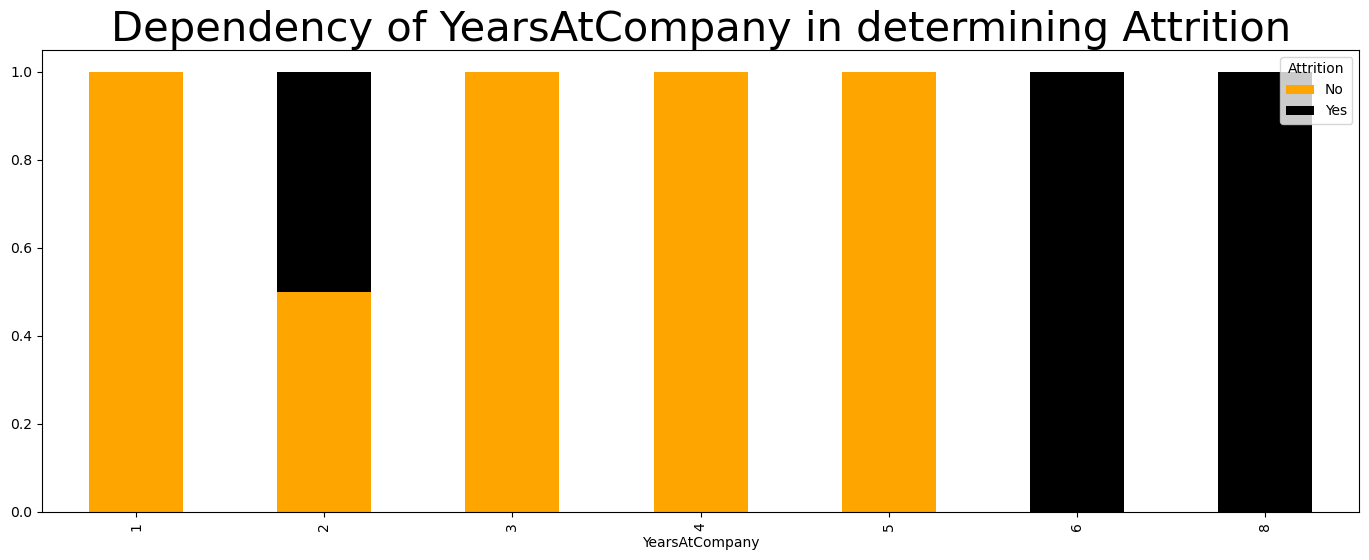

In [46]:
data=pd.crosstab(df['YearsAtCompany'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'black'], 
                                                figsize=(17,6))
plt.title('Dependency of YearsAtCompany in determining Attrition', fontsize=30)
plt.xlabel('YearsAtCompany')
plt.show()

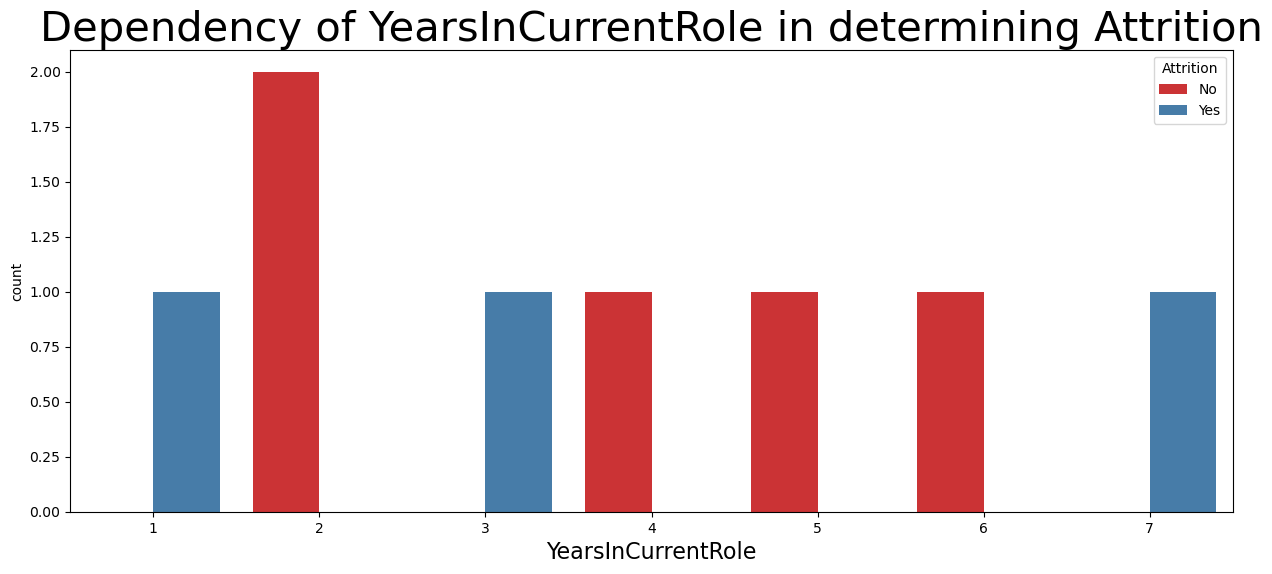

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example data setup (replace with your actual data loading step)
df = pd.DataFrame({
    'YearsInCurrentRole': [2, 3, 5, 2, 7, 4, 1, 6],
    'Attrition': ['No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No']
})

plt.figure(figsize=(15, 6))
sns.countplot(x='YearsInCurrentRole', hue='Attrition', data=df, palette='Set1')
plt.title('Dependency of YearsInCurrentRole in determining Attrition', fontsize=30)
plt.xlabel('YearsInCurrentRole', fontsize=16)
plt.show()


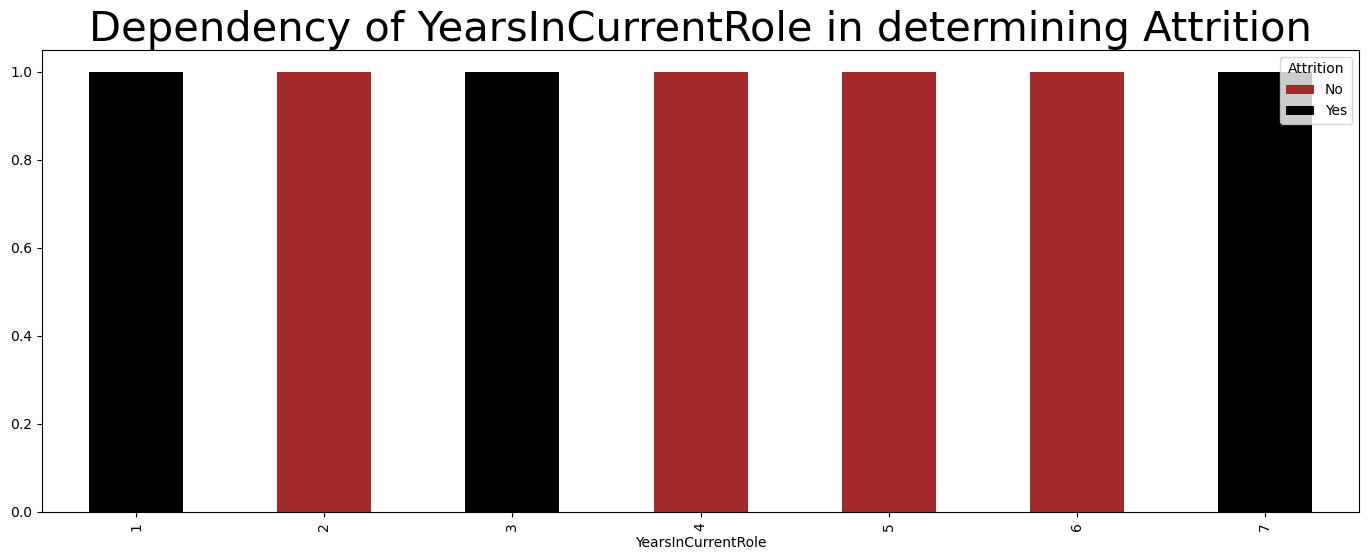

In [49]:
data=pd.crosstab(df['YearsInCurrentRole'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'black'], 
                                                figsize=(17,6))
plt.title('Dependency of YearsInCurrentRole in determining Attrition', fontsize=30)
plt.xlabel('YearsInCurrentRole')
plt.show()

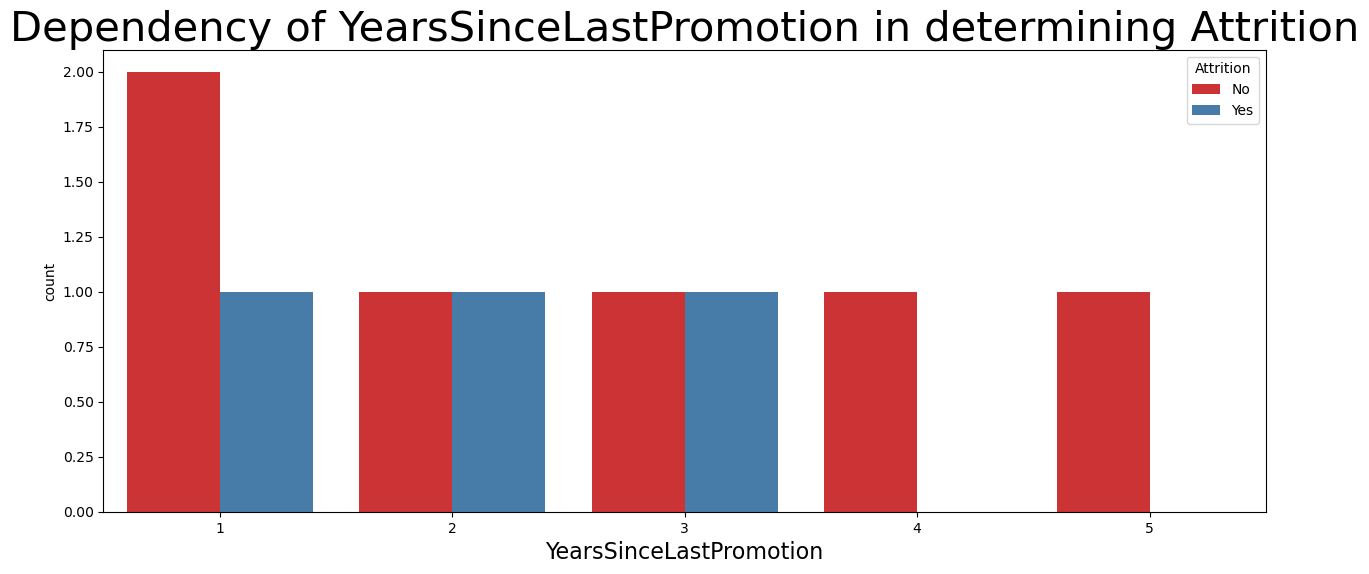

In [52]:
plt.figure(figsize=(15, 6))
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=df, palette='Set1')
plt.title('Dependency of YearsSinceLastPromotion in determining Attrition', fontsize=30)
plt.xlabel('YearsSinceLastPromotion', fontsize=16)
plt.show()


In [54]:
import pandas as pd

# Assuming df is loaded properly
print(df.columns)

# Check if 'YearsInCurrentRole' is in the columns
if 'YearsInCurrentRole' in df.columns:
    data = pd.crosstab(df['YearsInCurrentRole'], df['Attrition'])
    data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'black'], figsize=(17,6))
    plt.title('Dependency of YearsInCurrentRole in determining Attrition', fontsize=30)
    plt.show()
else:
    print("Column 'YearsInCurrentRole' not found in DataFrame.")


Index(['YearsSinceLastPromotion', 'Attrition'], dtype='object')
Column 'YearsInCurrentRole' not found in DataFrame.


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'YearsInCurrentRole' is in df.columns
print(df.columns)

# Plotting with sns.countplot
plt.figure(figsize=(15, 6))
sns.countplot(x='YearsInCurrentRole', hue='Attrition', data=df, palette='Set1')
plt.title('Dependency of YearsInCurrentRole in determining Attrition', fontsize=30)
plt.xlabel('YearsInCurrentRole')
plt.show()


Index(['YearsSinceLastPromotion', 'Attrition'], dtype='object')


ValueError: Could not interpret input 'YearsInCurrentRole'

<Figure size 1500x600 with 0 Axes>